In [1]:
from google.colab import  drive
import os
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CAPSTONE//
#DATA_PATH = '/content/drive/MyDrive/CAPSTONE/ArticlesText.csv'
#pickles_folder = os.listdir(DATA_PATH)

Mounted at /content/drive
/content/drive/MyDrive/CAPSTONE


In [2]:
import numpy as np 
import pandas as pd 
import os, json
import glob
import csv

In [3]:
import io
#read_covidarticles = pd.read_csv(io.BytesIO(uploaded['ArticlesText.csv']))
read_covidarticles = pd.read_csv("Articles2500_SPACY.csv")
read_covidarticles

,Unnamed: 0,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,body_text,processed_text
0,0,mumnjs2f,0ed44b0a01f65058a03e6db7c213860c8e1df18d,Medline; PMC; WHO,A case of severe autoimmune hemolytic anemia a...,10.1111/ijlh.13653,PMC8444646,34258873.0,no-cc,SARS-CoV-2 mRNA vaccine made by Pfizer and Bio...,...,Int J Lab Hematol,NaN,NaN,NaN,document_parses/pdf_json/0ed44b0a01f65058a03e6...,document_parses/pmc_json/PMC8444646.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34258873/;...,235821948.0,"| C A S E REP ORT\n\nThe patient, in this case...",c s e rep ort patient case 84-year-old man vie...
1,1,4zqt300p,ab9dafa8ec6532d6e45321b05db03bafae9d518b,Medline; PMC,Network Meta‐Analysis Comparing the Efficacy o...,10.1002/jpen.1030,PMC7166391,29388676.0,no-cc,BACKGROUND: This study aims to compare placebo...,...,JPEN J Parenter Enteral Nutr,NaN,NaN,NaN,document_parses/pdf_json/ab9dafa8ec6532d6e4532...,document_parses/pmc_json/PMC7166391.xml.json,https://doi.org/10.1002/jpen.1030; https://www...,46645417.0,Introduction\n\nInfants and children are most ...,introduction infants child susceptible bronchi...
2,2,d1t4w239,df10e2e92ab95cff91dbc6e7e2af3f341f057fe2,PMC,Flower Mimics Roll Out Multicolored Carpets to...,10.3390/insects12121097,PMC8706000,34940185.0,cc-by,"SIMPLE SUMMARY: Besides being a nuisance, hous...",...,Insects,NaN,NaN,NaN,document_parses/pdf_json/df10e2e92ab95cff91dbc...,document_parses/pmc_json/PMC8706000.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,Introduction\n\nHouse flies (Diptera: Muscidae...,introduction house fly diptera muscidae musca ...
3,3,3dvoppu2,6b509f54616ea76ec7d67d61c8ba9d4d0327ad65,PMC,Pathways of protein sorting and membrane traff...,10.1016/1043-4682(92)90020-v,PMC7128811,1457777.0,no-cc,Recent results have provided increasing eviden...,...,Semin Cell Biol,NaN,NaN,NaN,document_parses/pdf_json/6b509f54616ea76ec7d67...,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,\n\nSTUDIES CARRIED out in the 1960s and 70s d...,studies carried 1960s 70s demonstrate endoplas...
4,4,f1b4tr2t,06a61285ecbc70a5c6e9aa99d30fb79d5ccff2bf,Medline; PMC,Isolation and identification of leukocyte popu...,10.1177/0271678x211028496,PMC8795221,34250820.0,cc-by-nc,Using standard techniques during mechanical th...,...,J Cereb Blood Flow Metab,NaN,NaN,NaN,document_parses/pdf_json/06a61285ecbc70a5c6e9a...,document_parses/pmc_json/PMC8795221.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34250820/;...,235798131.0,"Introduction\n\nSince 2015, mechanical thrombe...",introduction 2015 mechanical thrombectomy stan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,nvplahsq,36cc23945a882e974b7886dda3d38867c518f708,Medline; PMC,Behavior of Children during Dental Care with R...,10.3390/dj9080089,PMC8393898,34436001.0,cc-by,Background: The establishment of the dental da...,...,Dent J (Basel),NaN,NaN,NaN,document_parses/pdf_json/36cc23945a882e974b788...,document_parses/pmc_json/PMC8393898.xml.json,https://doi.org/10.3390/dj9080089; https://www...,237307376.0,"Introduction\n\nThe dental dam, designed in 18...",introduction dental dam design 1864 dr. stanfo...
2496,2496,u0688uoh,44415c473aa8d0e1553db60c31dbd888c3aff569,Elsevier; PMC,Multi-zonal transmission dynamics of pandemic ...,10.1016/j.jnlssr.2020.11.002,PMC7690943,NaN,els-covid,"At the end of 2019, the novel coronavirus (COV...",...,NaN,NaN,NaN,NaN,document_parses/pdf_json/44415c473aa8d0e1553db...,NaN,https://api.elsevier.com/content/article/pii/S...,227171568.0,"Introduction\n\nIn early December 2019, the ou...",introduction early december 2019 outbreak larg...
2497,2497,ujufj0gq,342db8fcabc0719adf5f98c9e25058eecd306ac5,Medline; PMC; WHO,Improvement in the Cognitive Aspects of Cultur...,10.3390/ijerph18137102,PMC8297341,34281035.0,cc-by,Universities are providing short-term overseas...,...,Int J Environ Res Public H

In [4]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer

import spacy

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [24]:
stop_words=stopwords.words('english')
additional_words = ['not','they','would','shall','might','could','v','qpr','snp','"','– ','did','said','says','say','want','know',
                    'doi', 'preprint', 'copyright', 'org', 'https', 'et', 'al', 'author', 'figure', 'table',
    'rights', 'reserved', 'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI',
    '-PRON-', 'usually', 'et', 'al','time','level', 'group','model','well','one','addition','de','la','may','day','und','der','da','also','de',
    r'\usepackage{amsbsy', r'\usepackage{amsfonts', r'\usepackage{mathrsfs', r'\usepackage{amssymb', r'\usepackage{wasysym','different','may',
    r'\setlength{\oddsidemargin}{-69pt',  r'\usepackage{upgreek', r'\documentclass[12pt]{minimal','protein','cell','number','used','high','group',
    'model','using','figure','il','reported','table','time','datum','numb','include','low','provide']
for aw in additional_words:
  stop_words.append(aw)
lemmatizer = WordNetLemmatizer()
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
import seaborn as sns
import re,random
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import string


In [7]:
def lowercase_all(s):
  return s.lower()

def replace_unnecessary_chars(s):
    text = lowercase_all(s)
    text = re.sub('\w*\d\w*','', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r"\n\\x",'', text)
    return text

def remove_stop_words(s,stopwords):
    words = [word for word in s.split() if word.lower() not in stopwords]
    modern_txt = " ".join(words)
    return modern_txt

def text_cleaning(s,stopwords):
    lowered = lowercase_all(s)
    cleaned = remove_stop_words(lowered,stopwords)
    final_text = replace_unnecessary_chars(cleaned)
    return final_text

def sentence_tokenization(s):
    return nltk.tokenize.sent_tokenize(s)

def word_tokenization(s):
    return nltk.tokenize.word_tokenize(s)

def lemmatization_process(s):
    token_words = word_tokenization(s)
    sentence_lemma = []
    for word in token_words:
      sentence_lemma.append(lemmatizer.lemmatize(word))
    return " ".join(sentence_lemma)
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations




In [25]:
def eda_process_steps(col):
  read_covidarticles[col] = read_covidarticles[col].apply(lambda x : text_cleaning(x,stop_words))
  read_covidarticles[col] = read_covidarticles[col].apply(lambda x : lemmatization_process(x))
  return read_covidarticles[col]

read_covidarticles['processed_text'] = eda_process_steps('processed_text').copy()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

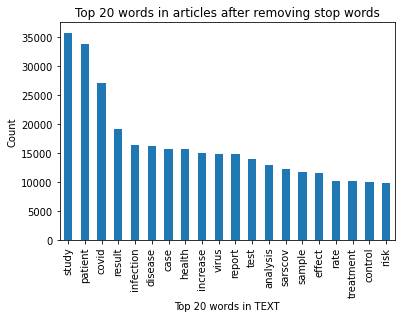

In [26]:
common_words = get_top_n_words(read_covidarticles['processed_text'], 20)
df2 = pd.DataFrame(common_words, columns = ['Reviewtext' , 'count'])

df2.groupby('Reviewtext').sum()['count'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Top 20 words in TEXT')
plt.title('Top 20 words in articles after removing stop words')
plt.show()

In [13]:
# Following functions have been referenced from - https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad

def plot_boxplots(data, plot_vars, labels, figsize):
    ''' Plot a box-plot of the variables in the plot_vars list using the labels and a size of figesize
        Input:
        - data: a dataframe, containing the data points to plot
        - plot_vars: a (1,x) array, containig the columns to plot
        - labels: a dictionary, to map the column names to its label
        - figsize: a tuple, indicating the size of the figure
    '''
    
   # We need to identify is this a matrix or a vector
    if plot_vars.ndim == 1:
        nrows=1
        ncols = plot_vars.shape[0]
    else:
        nrows= plot_vars.shape[0]
        ncols = plot_vars.shape[1]
    
    print(nrows,ncols)

    #Create a figure and its axes for the dimensions defined
    f, axes = plt.subplots(nrows, ncols, sharey=False, figsize=(15,5))
    #For every variable in the plot_vars
    for i in range(nrows):
        for j in range(ncols):
            # If the column name is defined we plot it
            if plot_vars[i,j]!=None:
                if axes.ndim>1:
                    #Set the title
                    axes[i,j].set_title(labels[plot_vars[i,j]])
                    axes[i,j].grid(True)
                    #Set x ticks
                    axes[i,j].tick_params(
                        axis='x',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False)
                    # Plot a boxplot for the column in plot_vars
                    axes[i,j].boxplot(data[plot_vars[i,j]])
                else:
                    #Set the title
                    axes[j].set_title(labels[plot_vars[i,j]])
                    axes[j].grid(True)
                    #Set x ticks
                    axes[j].tick_params(
                        axis='x',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False)
                    # Plot a boxplot for the column in plot_vars
                    axes[j].boxplot(data[plot_vars[i,j]])
                
            else:
                axes[i,j].set_visible(False)
    # Adjust the plots for a better visualization
    f.tight_layout()
    plt.show() 


def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_histograms(data, plot_vars, xlim, labels, figsize):
    ''' Function to plot the histograms of the variables in plot_vars
        Input:
        - data: a dataframe, containing the data points to plot
        - plot_vars: a (1,x) array, containig the columns to plot
        - xlim: a list, define the max x value for every column to plot
        - labels: a dictionary, to map the column names to its label
        - figsize: a tuple, indicating the size of the figure
    '''
    #Set some parameters
    kwargs = dict(hist_kws={'alpha':.7}, kde_kws={'linewidth':2})

    #cmap = get_cmap(plot_vars.shape[1])
    # Create the figure and axes
    fig, axes = plt.subplots(plot_vars.shape[0], plot_vars.shape[1], figsize=figsize, sharey=False, dpi=100)
    #For every variable in plot_vars
    for i in range(plot_vars.shape[1]):
        # Plot the histogram 
        sns.distplot(data[plot_vars[0,i]] , color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1),), 
                     ax=axes[i], axlabel=labels[plot_vars[0,i]], bins= 50, norm_hist = True)
        #For a better visualization we set the x limit
        axes[i].set_xlim(left=0, right=xlim[i])
        
    fig.tight_layout()

In [ ]:
labels_dict={'text_word_count': 'Word Count of Texts',
             'text_char_count': 'Char Count of Texts',
             'text_word_density': 'Word Density of Texts',
             'text_sent_density': 'Sentence Density of Texts',
             
             'text_sent_count': 'Sentence Count of Texts', 
             
             'text_stp_count': 'Stopwords Count of Texts'
           ,}

1 5


KeyError: ignored

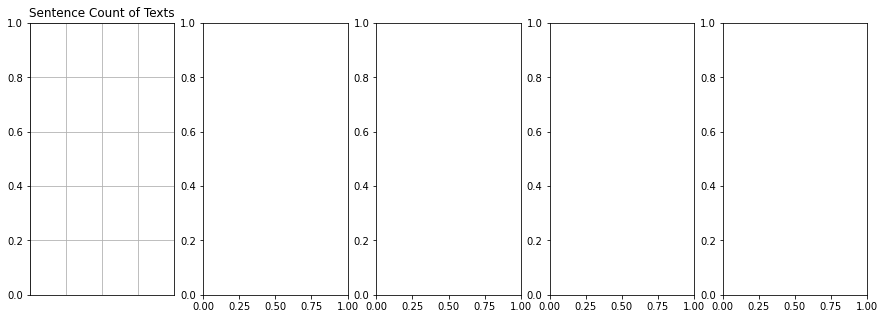

In [ ]:
plot_vars=np.array([['text_sent_count', 'text_word_count', 'text_char_count','text_sent_density','text_word_density']])
plot_boxplots(read_covidarticles, plot_vars, labels_dict, figsize=(10,3))


KeyError: ignored

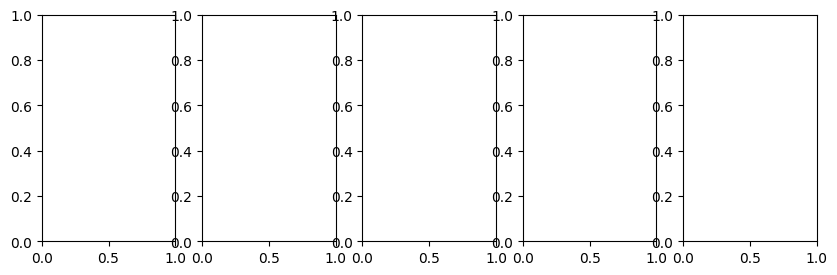

In [ ]:
plot_histograms(read_covidarticles, plot_vars, [2, 5, 10, 0.2, 0.3], labels_dict, figsize=(10,3))

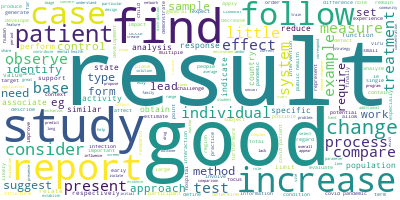

In [27]:
from wordcloud import WordCloud
long_string = ','.join(list(read_covidarticles['processed_text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = read_covidarticles.processed_text.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['rep', 'ort', 'patient', 'case', 'yearold', 'man', 'vietnam', 'war', 'veteran', 'greekturkish', 'descent', 'medical', 'history', 'significant', 'major', 'prostate', 'cancer', 'status', 'post', 'remote', 'prostatectomy', 'colon', 'cancer', 'status', 'post', 'remote', 'laparoscopic', 'right', 'hemicolectomy', 'patent']


In [29]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 5), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 3), (18, 1), (19, 3), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


In [30]:
from pprint import pprint
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.010*"study" + 0.008*"covid" + 0.006*"patient" + 0.004*"result" + '
  '0.004*"report" + 0.003*"case" + 0.003*"health" + 0.003*"infection" + '
  '0.003*"risk" + 0.003*"pandemic"'),
 (1,
  '0.009*"patient" + 0.008*"study" + 0.007*"covid" + 0.004*"result" + '
  '0.004*"increase" + 0.003*"virus" + 0.003*"sarscov" + 0.003*"disease" + '
  '0.003*"test" + 0.003*"health"'),
 (2,
  '0.010*"patient" + 0.007*"study" + 0.007*"covid" + 0.005*"health" + '
  '0.004*"disease" + 0.004*"infection" + 0.003*"report" + 0.003*"increase" + '
  '0.003*"case" + 0.003*"virus"'),
 (3,
  '0.011*"study" + 0.007*"covid" + 0.007*"patient" + 0.006*"virus" + '
  '0.005*"case" + 0.004*"infection" + 0.004*"test" + 0.004*"result" + '
  '0.004*"sarscov" + 0.004*"disease"'),
 (4,
  '0.008*"study" + 0.005*"infection" + 0.004*"patient" + 0.004*"covid" + '
  '0.004*"disease" + 0.004*"report" + 0.004*"health" + 0.003*"test" + '
  '0.003*"increase" + 0.003*"sample"'),
 (5,
  '0.007*"covid" + 0.006*"patient" + 0.005*"st

In [31]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()

   
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
       
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Percentage Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.5843,"patient, study, covid, case, health, increase,...","[rep, ort, patient, case, yearold, man, vietna..."
1,1,8.0,0.4511,"patient, study, covid, case, health, increase,...","[introduction, infant, child, susceptible, bro..."
2,2,8.0,0.7373,"patient, study, covid, case, health, increase,...","[introduction, house, fly, diptera, muscidae, ..."
3,3,4.0,0.8093,"study, infection, patient, covid, disease, rep...","[study, carried, demonstrate, endoplasmic, ret..."
4,4,9.0,0.5282,"patient, covid, study, health, infection, resu...","[introduction, mechanical, thrombectomy, stand..."
5,5,8.0,0.5520,"patient, study, covid, case, health, increase,...","[systematic, review, aim, protocol, registrati..."
6,6,0.0,0.8755,"study, covid, patient, result, report, case, h...","[introduction, extracellular, vesicle, ev, nat..."
7,7,6.0,0.7084,"study, patient, covid, result, case, disease, ...","[introduction, familial, fh, common, acquire, ..."
8,8,2.0,0.8776,"patient, study, covid, health, disease, infect...","[introduction, coronavirus, disease, covid, ou..."
9,9,6.0,0.6240,"study, patient, covid, result, case, disease, ...","[introduction, novel, coronavirus, sarscov, id..."


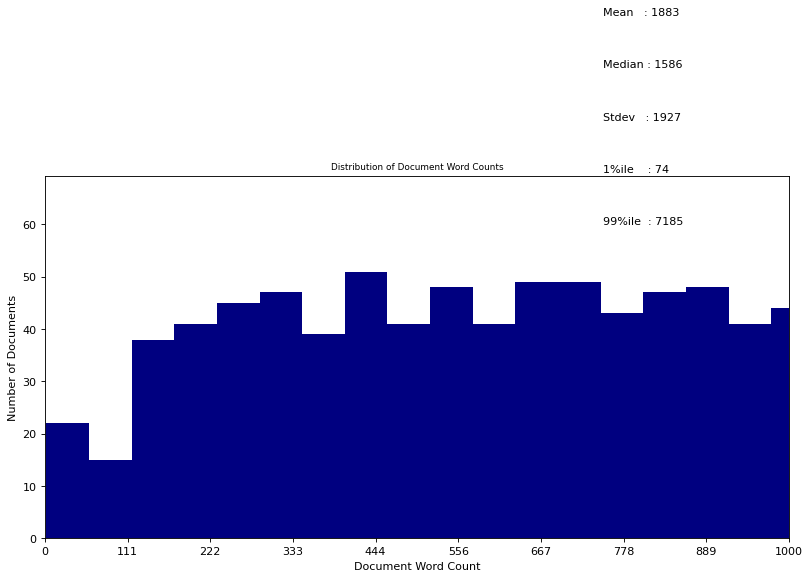

In [32]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

plt.figure(figsize=(12,6), dpi=80)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=4)
plt.xticks(np.linspace(0,1000,10))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=8))
plt.show()

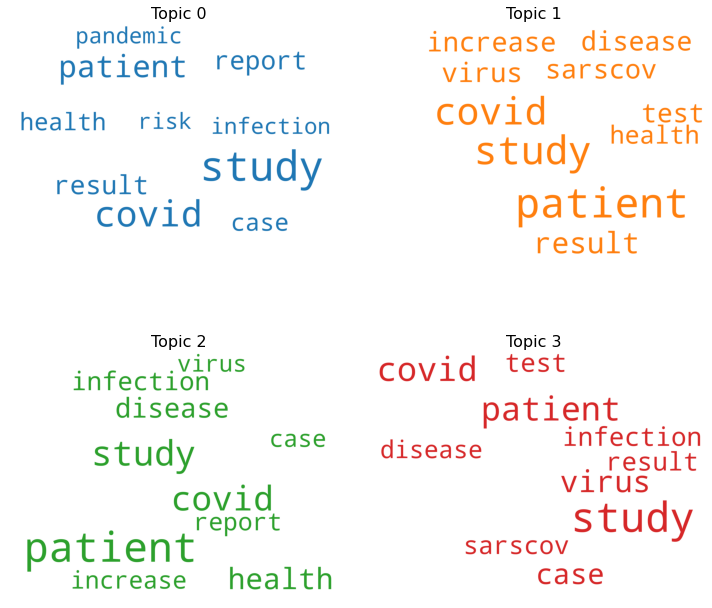

In [33]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

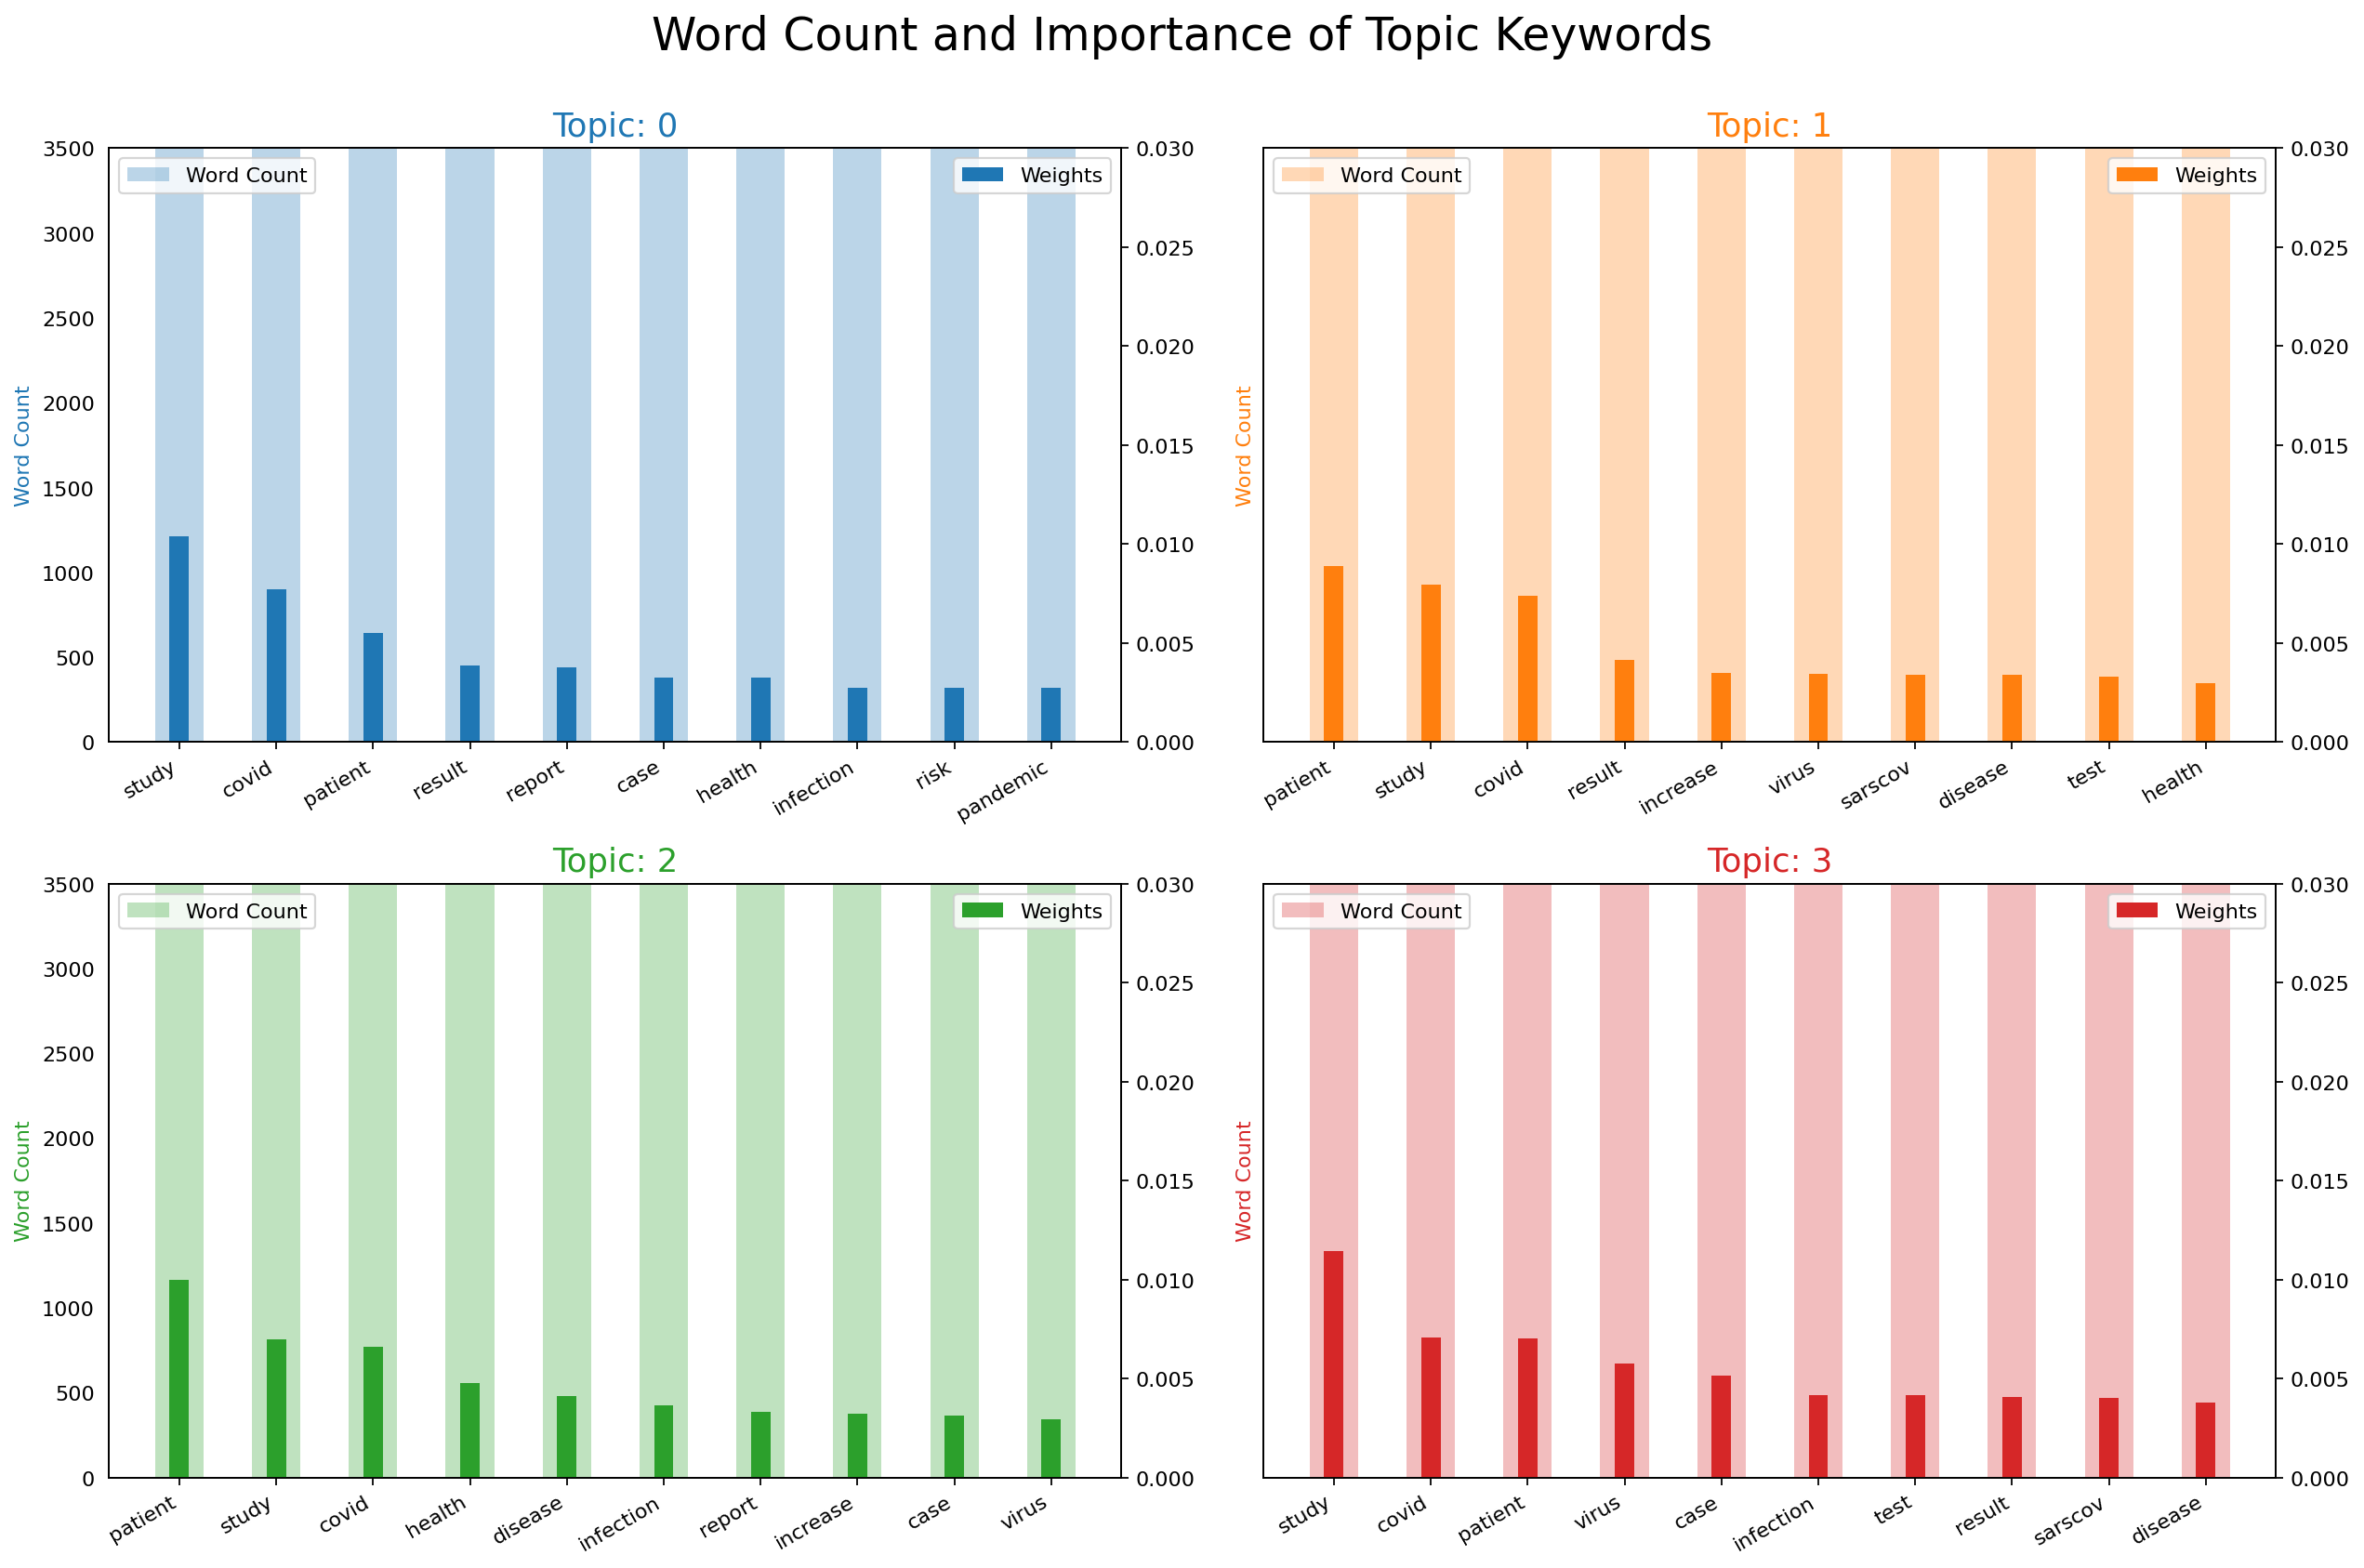

In [34]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [35]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [36]:
!pip install pyLDAvis


     |████████████████████████████████| 1.7 MB 13.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9cf13014ca9ff61a7eecbecf733298af6110cf32b52e8e2843ec83ebcf1aa18b
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [37]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [38]:
# Reference - https://medium.com/@nqabell89/visualizing-unsupervised-text-classification-output-with-pyldavis-370c1784ed58

pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.004271 -0.014894       1        1  23.234420
0     -0.004945  0.005279       2        1  11.009879
5     -0.004197  0.006602       3        1  10.811806
7      0.014968 -0.000666       4        1   9.061012
8     -0.003013  0.001809       5        1   8.861969
4      0.004371 -0.000507       6        1   8.482383
6      0.002373  0.004517       7        1   8.312280
1     -0.003434 -0.001503       8        1   8.311010
9      0.002465 -0.001589       9        1   6.082082
2     -0.004317  0.000952      10        1   5.833160, topic_info=          Term          Freq         Total Category  logprob  loglift
142    patient  32214.000000  32214.000000  Default  30.0000  30.0000
54       covid  28939.000000  28939.000000  Default  29.0000  29.0000
405     health  16285.000000  16285.000000  Default  28.0000  28.0000
200      study  37824.000000  37824.000000  Default  27.0000  27.0000
63     disease  16054.000000  16054.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
72      effect    624.772019  11712.829776  Topic10  -6.0859  -0.0894
568     result    751.197181  17731.186537  Topic10  -5.9016  -0.3198
7     analysis    584.949086  12248.030542  Topic10  -6.1517  -0.2000
188    sarscov    590.561359  12642.194882  Topic10  -6.1422  -0.2221
1194      test    507.617801  13992.404773  Topic10  -6.2935  -0.4749

[925 rows x 6 columns], token_table=        Topic      Freq    Term
term                           
5399        1  0.261978  aaichi
5399        2  0.074851  aaichi
5399        3  0.037425  aaichi
5399        4  0.037425  aaichi
5399        5  0.037425  aaichi
...       ...       ...     ...
132582      1  0.126865      δw
132582      4  0.126865      δw
132582      5  0.380595      δw
132582      8  0.126865      δw
132582      9  0.126865      δw

[4519 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 8, 9, 5, 7, 2, 10, 3])